In [1]:
import numpy as np
import csv
from tqdm import tqdm
import base64
from io import BytesIO
import requests
import io
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras import models
from keras.layers import Input,Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from keras.layers.merge import concatenate
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import tensorflow as tf
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.regularizers import L1L2
from keras.regularizers import Regularizer
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Username of your GitHub account
username = ''

# Personal Access Token (PAO) from your GitHub account
token = ''

# Creates a re-usable session object with your creds in-built
github_session = requests.Session()
github_session.auth = (username, token)


In [4]:
url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-3-wrangling-preprocessing/All_merged/All_data_sources_merged_updated.csv'
download = github_session.get(url).content #Reading and downloading the data
data = pd.read_csv(io.StringIO(download.decode('utf-8'))) #Converting the data into a pd dataframe

#Extract instagram data from all dataseources
news_articles = data.loc[data['data source']=='news article']
news_articles.to_csv('news_articles.csv')

In [5]:
news_articles = pd.read_csv('news_articles.csv') 

In [6]:
news_articles.head(10)

,Unnamed: 0,Id,title,time,keywords,data source,category,country,source URL,body,language
0,0,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,2014-08-14 07:00:00+00:00,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",news article,drought,China,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,English
1,1,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",2014-08-12 07:00:00+00:00,"['criticized', 'river', 'drought', 'farmers', ...",news article,drought,China,https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...",English
2,2,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",2014-08-08 07:00:00+00:00,"['bertness', 'chinese', 'research', 'sea', 'ec...",news article,none,China,https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,English
3,3,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,2014-08-11 07:00:00+00:00,"['climate', 'drought', 'ancient', 'agriculture...",news article,drought,China,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,English
4,4,DR-2014-000109-CHN,California's severe drought unchanged despite ...,2014-08-07 07:00:00+00:00,"['drought', 'states', 'rain', 'despite', 'cali...",news article,drought,China,https://www.latimes.com/local/lanow/la-me-ln-r...,A series of thunderstorms that have hit Califo...,English
5,5,DR-2014-000109-CHN,California Drought Helps Rim Fire Recovery - C...,2014-08-11 07:00:00+00:00,"['soil', 'recovery', 'large', 'drought', 'fore...",news article,drought,China,https://www.circleofblue.org/2014/world/califo...,Little rain is not a problem for land managers...,English
6,6,DR-2014-000109-CHN,Bottled Water Comes From the Most Drought-Ridd...,2014-08-11 07:00:00+00:00,"['industry', 'bottled', 'tap', 'places', 'drou...",news article,drought,China,https://www.motherjones.com/environment/2014/0...,"\n\n\n\nUpdate, 4/13/15: This article has been...",English
7,7,DR-2014-000109-CHN,End of Volvo product drought is near - Automot...,2014-08-04 07:00:00+00:00,"['v40', 'drought', 'platform', 'wagon', 'relea...",news article,none,China,https://www.autonews.com/article/20140804/OEM0...,"""It will be in the first time in the history o...",English
8,8,DR-2014-000109-CHN,"For groundwater, local management proves effec...",2014-08-06 07:00:00+00:00,"['district', 'basin', 'management', 'proves', ...",news article,drought,China,https://www.agalert.com/story/?id=7007,"For groundwater, local management proves effec...",English
9,9,DR-2014-000109-CHN,Drought conditions plague Aandhra Pradesh almo...,2014-08-10 07:00:00+00:00,"['temperatures', 'ocean', 'season', 'pradesh',...",news article,drought,China,https://timesofindia.indiatimes.com/india/Drou...,VISAKHAPATNAM/ HYDERABAD: Even as the two stat...,English


In [7]:
news_articles.shape

(2465, 11)

In [8]:
news_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   2465 non-null   int64 
 1   Id           2465 non-null   object
 2   title        2465 non-null   object
 3   time         2465 non-null   object
 4   keywords     2465 non-null   object
 5   data source  2465 non-null   object
 6   category     2465 non-null   object
 7   country      2465 non-null   object
 8   source URL   2465 non-null   object
 9   body         2465 non-null   object
 10  language     2465 non-null   object
dtypes: int64(1), object(10)
memory usage: 212.0+ KB


In [9]:
drop_columns = ['Unnamed: 0', 'time', 'keywords', 'data source', 'country', 'source URL', 'language', 'Id']
news_articles_clean = news_articles.drop(columns=drop_columns,axis=1)

In [10]:
news_articles_clean.head(5)

,title,category,body
0,Worst drought in 63 years hits Liaoning provin...,drought,Liaoning averaged 90mm across the province in ...
1,"In Time Of Drought, U.S. West's Alfalfa Export...",drought,"In Time Of Drought, U.S. West's Alfalfa Export..."
2,"More Chinese on the Coast, Less Fish in the Se...",none,China's booming economic growth is helping to ...
3,Climate change and drought in ancient times - ...,drought,The influence of climate on agriculture is bel...
4,California's severe drought unchanged despite ...,drought,A series of thunderstorms that have hit Califo...


In [11]:
def preprocess(article):
    """
    This function takes a string as input, then performs these operations: 
        - lowercase
        - remove URLs
        - remove ticker symbols 
        - removes punctuation
        - removes any single character tokens
    Parameters
    ----------
        message : The text message to be preprocessed
    Returns
    -------
        text: The preprocessed text
    """ 
    # Lowercase the article
    text = article.lower()
    # Replace URLs with a space in the message
    text = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', text)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    text = re.sub('\$[a-zA-Z0-9]*', ' ', text)
    text = re.sub('\@[a-zA-Z0-9]*', ' ', text)
    # Replace everything not a letter or apostrophe with a space
    text = re.sub('[^a-zA-Z\']', ' ', text)
    # Remove single letter words
    text = ' '.join( [w for w in text.split() if len(w)>1] )
    
    return text
        
# Process for all messages
preprocessed = [preprocess(posts) for posts in tqdm(news_articles_clean['title'])]

100%|██████████| 2465/2465 [00:00<00:00, 94208.07it/s]


In [12]:
news_articles_clean['Cleaned_title']= preprocessed

In [13]:
news_articles_clean.head(5)

,title,category,body,Cleaned_title
0,Worst drought in 63 years hits Liaoning provin...,drought,Liaoning averaged 90mm across the province in ...,worst drought in years hits liaoning province ...
1,"In Time Of Drought, U.S. West's Alfalfa Export...",drought,"In Time Of Drought, U.S. West's Alfalfa Export...",in time of drought west's alfalfa exports are ...
2,"More Chinese on the Coast, Less Fish in the Se...",none,China's booming economic growth is helping to ...,more chinese on the coast less fish in the sea...
3,Climate change and drought in ancient times - ...,drought,The influence of climate on agriculture is bel...,climate change and drought in ancient times sc...
4,California's severe drought unchanged despite ...,drought,A series of thunderstorms that have hit Califo...,california's severe drought unchanged despite ...


**Class balancing for category column**

In [14]:
news_articles_clean.category.value_counts()

none              1078
flood              977
drought            299
flood_drought       93
tree                11
climate_change       7
Name: category, dtype: int64

In [15]:
news_articles_flood = news_articles_clean[news_articles_clean.category == 'flood']
news_articles_flood.shape

(977, 4)

In [16]:
news_articles_none = news_articles_clean[news_articles_clean.category == 'none']
news_articles_none.shape

(1078, 4)

In [17]:
df_flood = shuffle(news_articles_flood)
df_none = shuffle(news_articles_none)

In [18]:
news_articles_train_f= df_flood.head(781)
news_articles_train_f.shape

(781, 4)

In [19]:
news_articles_train_n= df_none.head(781)
news_articles_train_n.shape

(781, 4)

In [20]:
news_articles_test_f= df_flood.tail(196)
news_articles_test_f.shape

(196, 4)

In [21]:
news_articles_test_n= df_none.tail(196)
news_articles_test_n.shape

(196, 4)

In [22]:
#concatenating
news_articles_train =pd.concat([news_articles_train_f,news_articles_train_n], ignore_index=True)
news_articles_train = shuffle(news_articles_train)
news_articles_train.shape

(1562, 4)

In [23]:
news_articles_train.category.value_counts()

flood    781
none     781
Name: category, dtype: int64

In [24]:
#concatenating
news_articles_test =pd.concat([news_articles_test_f,news_articles_test_n], ignore_index=True)
news_articles_test = shuffle(news_articles_test)
news_articles_test.shape

(392, 4)

In [25]:
#changing the type from object to category
news_articles_train['category']=news_articles_train['category'].astype('category')
news_articles_test['category']=news_articles_test['category'].astype('category')

In [26]:
# Get the numerical ids of column label
numerical_ids_train = news_articles_train.category.cat.codes
numerical_ids_test = news_articles_test.category.cat.codes

# Print initial shape
print(numerical_ids_train.shape)
print(numerical_ids_test.shape)

(1562,)
(392,)


In [27]:
le = LabelEncoder()
Y = le.fit_transform(news_articles_test['category'].values)
Y_test = le.transform(news_articles_train['category'].values)
len(le.classes_)

2

In [28]:
# One-hot encode the indexes
Y = to_categorical(numerical_ids_train)
Y_test = to_categorical(numerical_ids_test)

# Check the new shape of the variable
print(Y.shape)
print(Y_test.shape)

# Print the first 5 rows
print(Y[:5])

(1562, 2)
(392, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


**fit_on_texts:** Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, "The cat sat on the mat." It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"] = 2 it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. So lower integer means more frequent word (often the first few are stop words because they appear a lot).


**texts_to_sequences:** Transforms each text in texts to a sequence of integers. So it basically takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

In [29]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_articles_train.Cleaned_title)
# Create the (X, Y) variables
X = tokenizer.texts_to_sequences(news_articles_train.Cleaned_title)
X = pad_sequences(X, maxlen=20)
#Y = to_categorical(news_articles_train.category)
# Print the shapes
print(X.shape)
print(Y.shape)

(1562, 20)
(1562, 2)


In [30]:
X_test = tokenizer.texts_to_sequences(news_articles_test.Cleaned_title)
X_test = pad_sequences(X_test, maxlen=20)
#Y_test = to_categorical(news_articles_test.category)
print(X_test.shape)
print(Y_test.shape)

(392, 20)
(392, 2)


In [31]:
import pickle
with open("tokenizer_newsarticles_flood.pkl", 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
with open("label_encoder_newsarticles_flood.pkl", 'wb') as file:
    pickle.dump(le, file, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
MAX_SEQUENCE_LENGTH = 100
MAX_NB_WORDS = 5000
EMBEDDING_DIM = 300
num_lstm = np.random.randint(175, 275)
num_dense = np.random.randint(100, 150)
rate_drop_lstm = 0.15 + np.random.rand() * 0.25
rate_drop_dense = 0.15 + np.random.rand() * 0.25

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 4886 unique tokens.


In [33]:
EMBEDDING_FILE= '/content/gdrive/MyDrive/GoogleNews-vectors-negative300.bin.gz'

In [34]:
from gensim.models import KeyedVectors

print('Indexing word vectors')
word2vec = KeyedVectors.load_word2vec_format(EMBEDDING_FILE,binary=True)
print('Found %s word vectors of word2vec' % len(word2vec.vocab))

print('Preparing embedding matrix')

nb_words = min(MAX_NB_WORDS, len(word_index))+1

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if word in word2vec.vocab:
        embedding_matrix[i] = word2vec.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Indexing word vectors
Found 3000000 word vectors of word2vec
Preparing embedding matrix
Null word embeddings: 828


In [35]:
import numpy as np
np.save('embedding_matrix_newsarticles_flood.npy' , embedding_matrix)

In [36]:
from keras.optimizers import SGD,Adam
opt = SGD(learning_rate=0.01)
opt1= Adam(learning_rate=0.0001) 

In [37]:
model= Sequential()
model.add(Embedding(nb_words,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False))
model.add(LSTM(num_lstm, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer=opt1,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          1466100   
_________________________________________________________________
lstm (LSTM)                  (None, 272)               623424    
_________________________________________________________________
dense (Dense)                (None, 32)                8736      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 2,098,326
Trainable params: 632,226
Non-trainable params: 1,466,100
_________________________________________________________________


In [38]:
epochs= 8
batch_size= 12

history= model.fit(X,Y,epochs=epochs,batch_size=batch_size,validation_split=0.1)

Epoch 1/8
118/118 [==============================] - 32s 82ms/step - loss: 0.6575 - accuracy: 0.6321 - val_loss: 0.5358 - val_accuracy: 0.7580
Epoch 2/8
118/118 [==============================] - 9s 75ms/step - loss: 0.4514 - accuracy: 0.8283 - val_loss: 0.4277 - val_accuracy: 0.8408
Epoch 3/8
118/118 [==============================] - 9s 75ms/step - loss: 0.3926 - accuracy: 0.8443 - val_loss: 0.4042 - val_accuracy: 0.8344
Epoch 4/8
118/118 [==============================] - 9s 73ms/step - loss: 0.3853 - accuracy: 0.8388 - val_loss: 0.3928 - val_accuracy: 0.8408
Epoch 5/8
118/118 [==============================] - 9s 74ms/step - loss: 0.3512 - accuracy: 0.8695 - val_loss: 0.3861 - val_accuracy: 0.8408
Epoch 6/8
118/118 [==============================] - 9s 75ms/step - loss: 0.3451 - accuracy: 0.8593 - val_loss: 0.4100 - val_accuracy: 0.8153
Epoch 7/8
118/118 [==============================] - 9s 75ms/step - loss: 0.3016 - accuracy: 0.8823 - val_loss: 0.3854 - val_accuracy: 0.8535
Epoch

Text(0.5, 1.0, 'Loss')

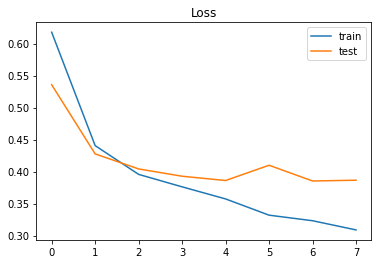

In [39]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Accuracy')

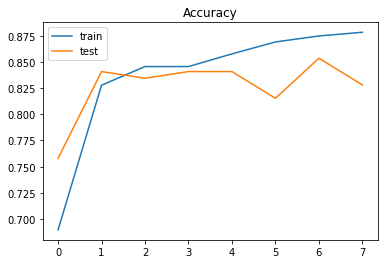

In [40]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**Predicting Data**

In [41]:
y_pred = model.predict(X_test)

In [42]:
import numpy as np
y_pred=np.round(y_pred)

In [43]:
y_pred = np.argmax(y_pred, axis=-1)

In [44]:
y_test = np.argmax(Y_test, axis=-1)

In [45]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [46]:
# Accuracy
print(accuracy_score(y_test, y_pred))

0.8290816326530612


In [47]:
lab_names = ['flood','none']
print(classification_report(y_test, y_pred, target_names=lab_names))

              precision    recall  f1-score   support

       flood       0.80      0.87      0.84       196
        none       0.86      0.79      0.82       196

    accuracy                           0.83       392
   macro avg       0.83      0.83      0.83       392
weighted avg       0.83      0.83      0.83       392



In [48]:
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))
print(f1_score(y_test, y_pred, average=None))

[0.8028169 0.8603352]
[0.87244898 0.78571429]
[0.83618582 0.82133333]


In [49]:
model.save('LSTMClassifier_with_newarticlesg_flood.h5')